In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras 
from keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, LeakyReLU, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
path = "D:\\Projects\\Bone Fracture Classifier\\Dataset\\"

In [3]:

train_data = utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)
validation_data = utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42,
)
label = train_data.class_names

Found 1129 files belonging to 10 classes.
Using 1017 files for training.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [4]:
def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img
train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [5]:
x_train = []
y_train = []
for images, labels in train_dataset:
        x_train.append(images.numpy())
        y_train.append(labels.numpy())
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [6]:
x_val = []
y_val = []

for images, labels in val_dataset:
    x_val.append(images.numpy())
    y_val.append(labels.numpy())
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [7]:
Num_Labels = len(label)
y_train = utils.to_categorical(y_train, Num_Labels)
y_val = utils.to_categorical(y_val, Num_Labels)

In [1]:
model = Sequential()
input_shape = (256, 256, 3)
model.add(Input(shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt= Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,510,858 (120.20 MB)

 Trainable params: 31,510,858 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [10]:
history = model.fit(x_train,y_train,
                    epochs=30,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 403ms/step - accuracy: 0.1137 - loss: 2.8800 - val_accuracy: 0.1875 - val_loss: 2.2488
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.1963 - loss: 2.2318 - val_accuracy: 0.3125 - val_loss: 2.0043
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 389ms/step - accuracy: 0.3280 - loss: 1.9331 - val_accuracy: 0.5446 - val_loss: 1.5188
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 0.5615 - loss: 1.4022 - val_accuracy: 0.7411 - val_loss: 1.0313
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 379ms/step - accuracy: 0.7722 - loss: 0.8943 - val_accuracy: 0.8571 - val_loss: 0.6846
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 0.8867 - loss: 0.4906 - val_accuracy: 0.9107 - val_loss: 0.4872
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.9377 - loss: 0.2827 - val_accuracy: 0.9018 - val_loss: 0.4622
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.9767 - loss: 0.1990 - val_accu

In [11]:
test_loss, test_accuracy = model.evaluate(x_val, y_val)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9500 - loss: 0.1786
Test Loss: 0.2413032501935959
Test Accuracy: 0.9375


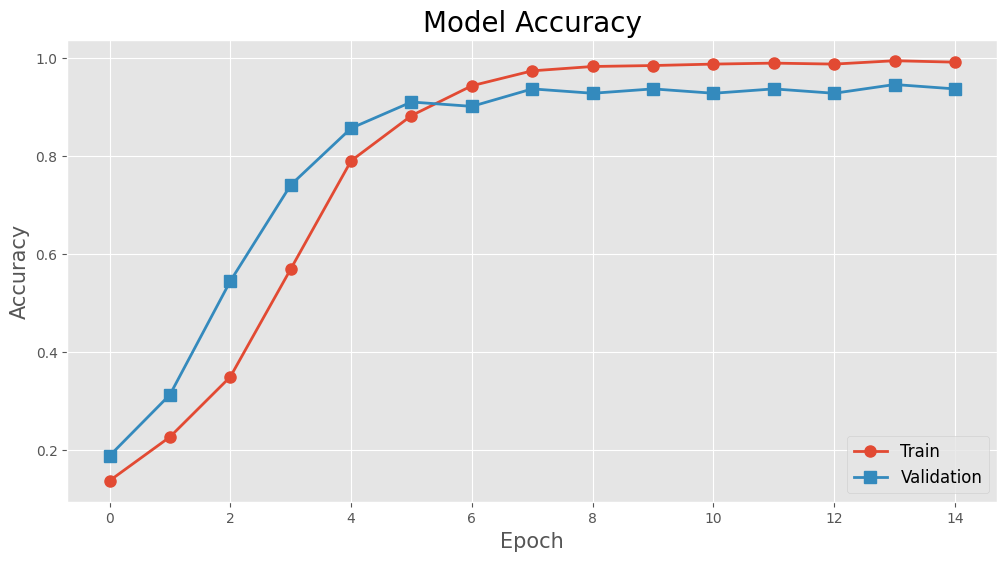

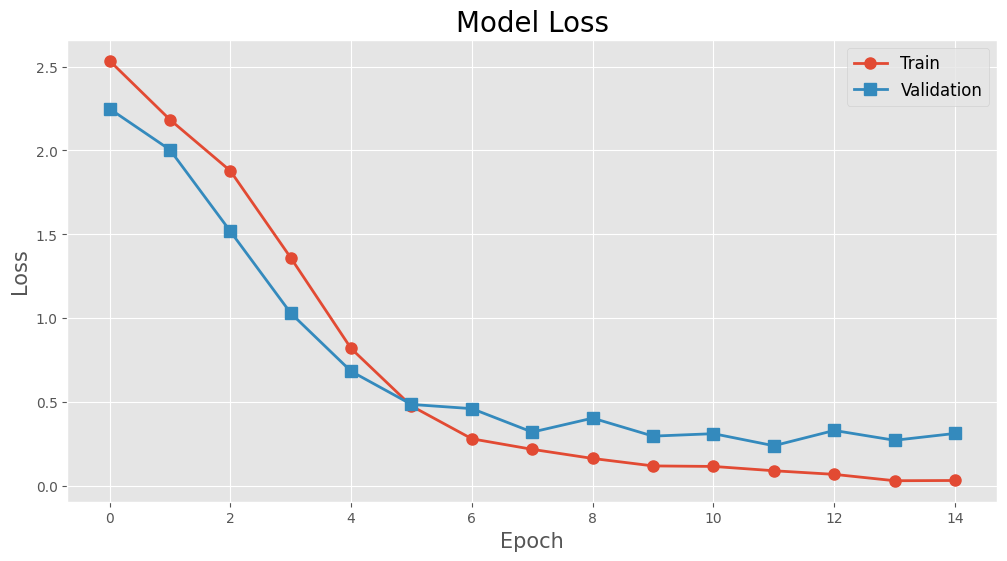

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'o-', linewidth=2, markersize=8, label='Train')
plt.plot(history.history['val_accuracy'], 's-', linewidth=2, markersize=8, label='Validation')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], 'o-', linewidth=2, markersize=8, label='Train')
plt.plot(history.history['val_loss'], 's-', linewidth=2, markersize=8, label='Validation')
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.show()